# 🏦 Bank Customer Churn Analysis 📊

## 📌 Introduction
This notebook provides a comprehensive analysis to predict bank customer churn using various robust and accurate classification models. The goal is to identify customers who are likely to leave the bank and understand the factors influencing their decisions.

## 🔄 Workflow

### [1. 📥 Importing the Data](#chapter1)
   - Load the dataset and understand its structure.

### [2. 🧹 Data Cleaning](#chapter2)
   - Handle missing values, encode categorical variables, and standardize numerical features.

### [3. 🔍 Exploratory Data Analysis (EDA)](#chapter3)
   - Visualize and summarize the data to uncover patterns and insights.

### [4. 🧠 Model Training & Evaluation](#chapter4)
   #### **Models:**
   * 🌳 [Decision Trees](#m1)
   * 🌲 [Random Forest](#m2)
   * 📍 [K-Nearest Neighbors (KNN)](#m3)
   * 📈 [Logistic Regression](#m4)
   
   #### **Evaluation Metrics:**
   - Precision, Recall, F1 Score, ROC AUC, Precision-Recall AUC

### [5. 📝 Conclusion](#chapter5)
   - Summarize findings, model performance, and provide actionable insights for reducing customer churn.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv


In [2]:
%matplotlib inline

## 1. Importing the data <a class="anchor" id="chapter1"></a>

In [3]:
df=pd.read_csv("/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv")

## Database Information
- **RowNumber**: Record (row) number, no effect on the output.
- **CustomerId**: Random values, no effect on customer leaving the bank.
- **Surname**: Customer's surname, no impact on their decision to leave.
- **CreditScore**: Higher credit score, less likely to leave.
- **Geography**: Customer’s location can affect their decision to leave.
- **Gender**: Explore if gender plays a role in leaving.
- **Age**: Older customers are less likely to leave.
- **Tenure**: Number of years as a client; older clients are more loyal.
- **Balance**: Higher account balance, less likely to leave.
- **NumOfProducts**: Number of products purchased through the bank.
- **HasCrCard**: Whether a customer has a credit card; those with cards are less likely to leave.
- **IsActiveMember**: Active customers are less likely to leave.
- **EstimatedSalary**: Lower salary, more likely to leave.
- **Exited**: Whether the customer left the bank.
- **Complain**: Customer has complaints or not.
- **Satisfaction Score**: Score provided by the customer for complaint resolution.
- **Card Type**: Type of card held by the customer.
- **Points Earned**: Points earned by the customer for using credit card.


In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


## 2. Data Cleaning <a class="anchor" id="chapter2"></a>

In [7]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [8]:
df.rename(columns={"Satisfaction Score":"SatisfactionScore",
                   "Point Earned":"PointEarned",
                  "Card Type":"CardType"},inplace=True
         )

Drop unnecessary columns :

In [9]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

Convert categorical columns into quantitative columns :

In [10]:
categoricalCols = df.select_dtypes(include='object').columns
categoricalCols

Index(['Geography', 'Gender', 'CardType'], dtype='object')

In [11]:
for col in categoricalCols :
    print(df[col].value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64
CardType
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64


In [12]:
for col in categoricalCols :
    dummyVar= pd.get_dummies(df[col]).astype(int)
    df=pd.concat([df,dummyVar],axis=1)
    
df.drop(columns=categoricalCols,inplace=True)

df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,PointEarned,France,Germany,Spain,Female,Male,DIAMOND,GOLD,PLATINUM,SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,...,464,1,0,0,1,0,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,...,456,0,0,1,1,0,1,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,...,377,1,0,0,1,0,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,...,350,1,0,0,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,...,425,0,0,1,1,0,0,1,0,0


## 3. Exploratory Data Analysis (EDA) <a class="anchor" id="chapter3"></a>

<Figure size 800x600 with 0 Axes>

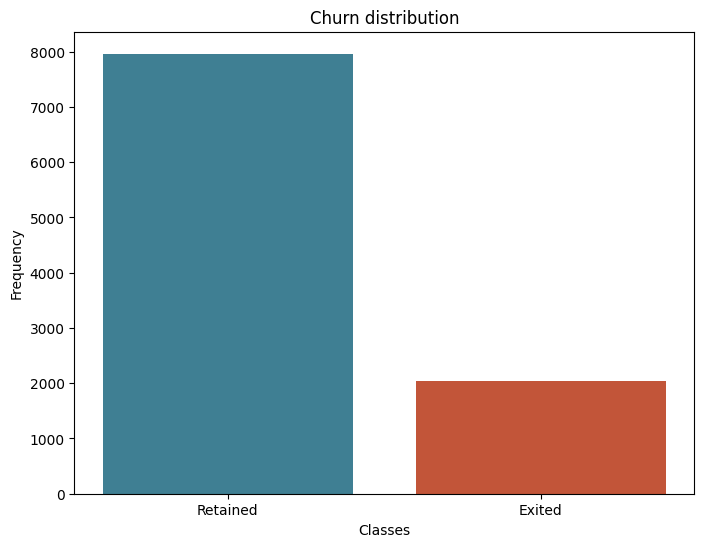

In [13]:
plt.figure(figsize=(8, 6))

labels = ['Retained', 'Exited']
colors = ['#3f7f93', '#c25539']

class_counts = [len(df[df['Exited'] == 0]), len(df[df['Exited'] == 1])]

plt.figure(figsize=(8, 6))
plt.bar(['Retained', 'Exited'], class_counts, color=[colors[0], colors[1]])
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Churn distribution')

plt.show()

In [14]:
df['Exited'].value_counts(normalize=True)

Exited
0    0.7962
1    0.2038
Name: proportion, dtype: float64

The barplots shows that :

- 20.4% of clients are exited.
- 79.6% of clients are retained.

Based on this distribution, we can say that we have an imbalanced dataset. The exited clients represent a minority class, making it almost a rare class.

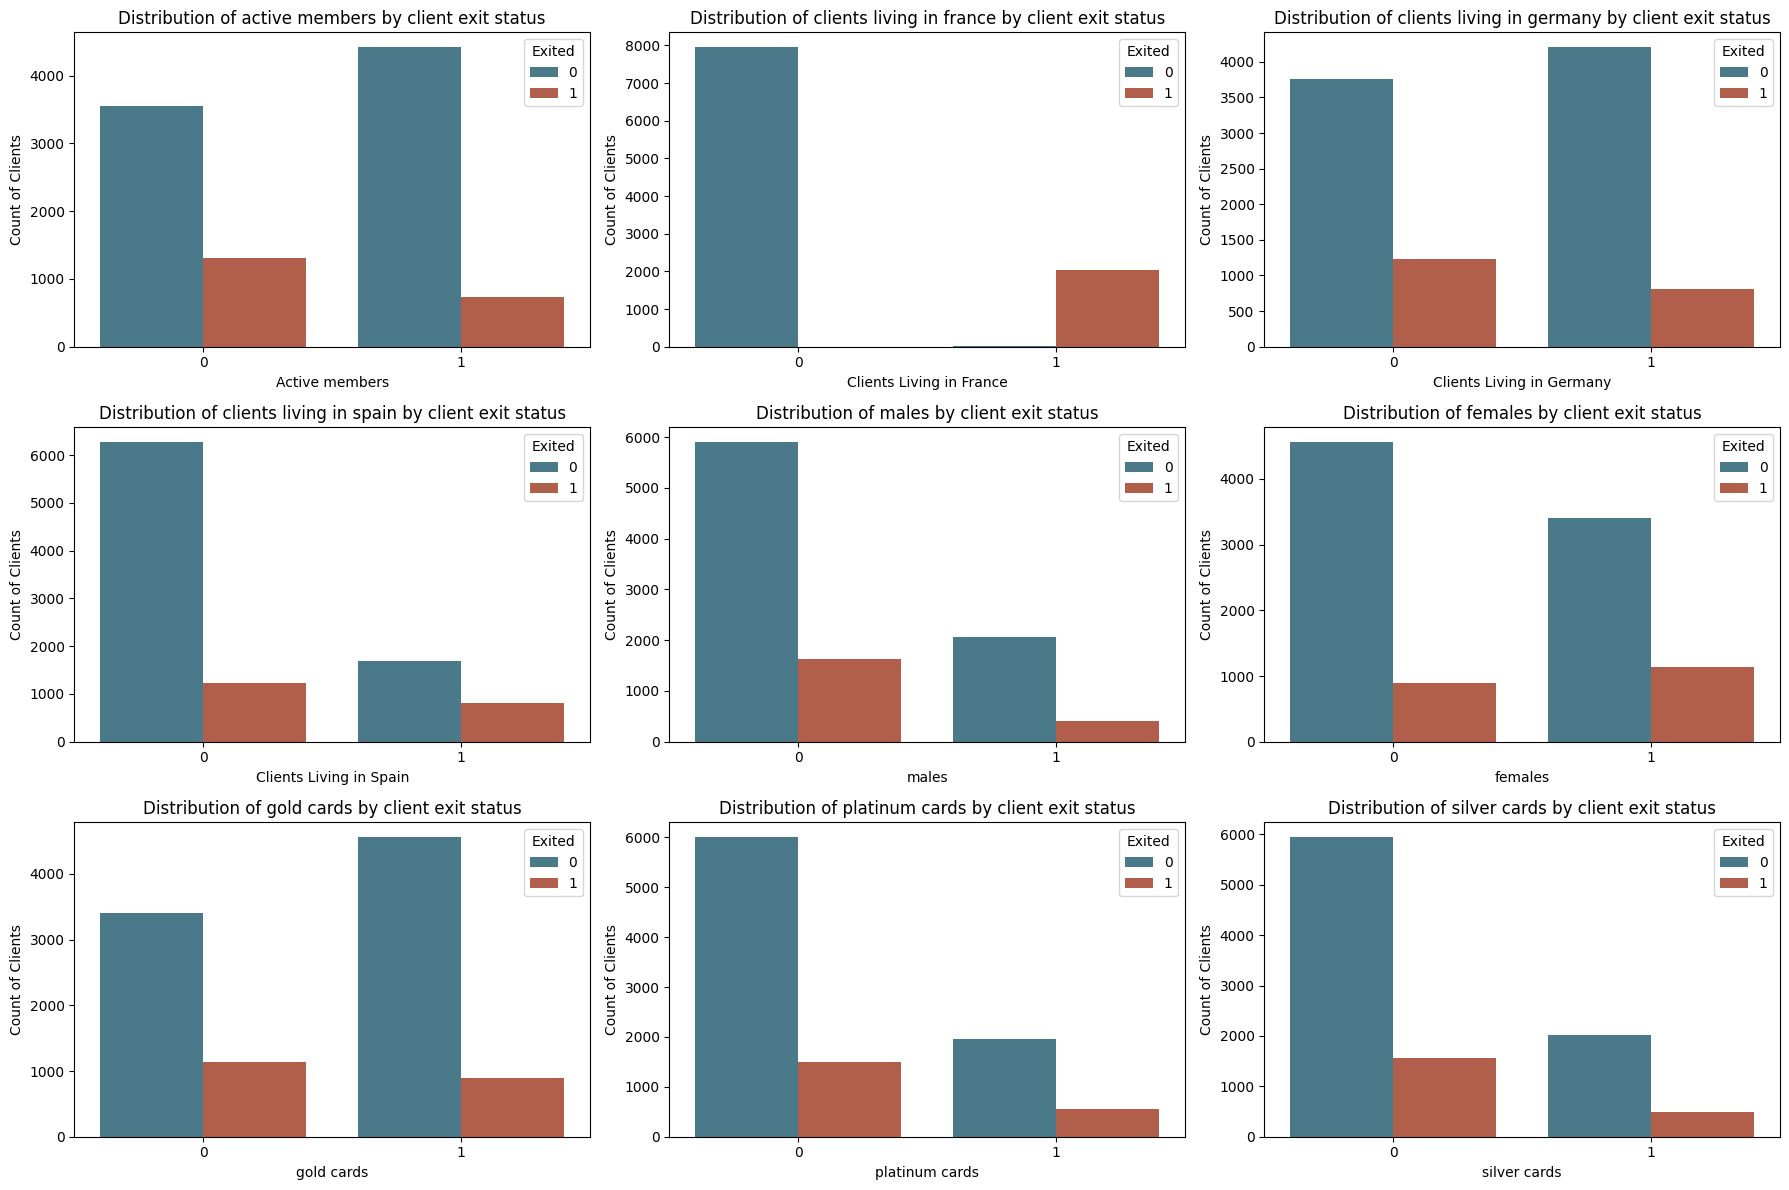

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(18, 12)) #creates a figure (fig) and a grid of subplots (axes) with 2 rows and 3 columns.

columns = ['IsActiveMember', 'Complain', 'France', 'Germany','Spain',
       'Female', 'Male', 'DIAMOND', 'GOLD', 'PLATINUM', 'SILVER']
titles = ["Active members", "Clients Living in France", "Clients Living in Germany", "Clients Living in Spain", "males", "females",
          "gold cards","platinum cards","silver cards"]

for ax, column, title in zip(axes.flatten(), columns, titles): #axes.flatten() converts the 2x3 grid of axes into a 1D array so that we can iterate over it easily.
    sns.countplot(data=df, x=column, hue='Exited', ax=ax, palette=colors)
    ax.set_title(f"Distribution of {title.lower()} by client exit status", loc='center')
    ax.set_xlabel(title)
    ax.set_ylabel("Count of Clients")


# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

Based on the subplots, we can observe that non-exited clients generally have higher scores compared to exited clients across all the features plotted. This pattern holds true in various scenarios, such as when clients are active or not active. Additionally, a notable observation is that clients from France tend to exit more frequently than clients from other countries.

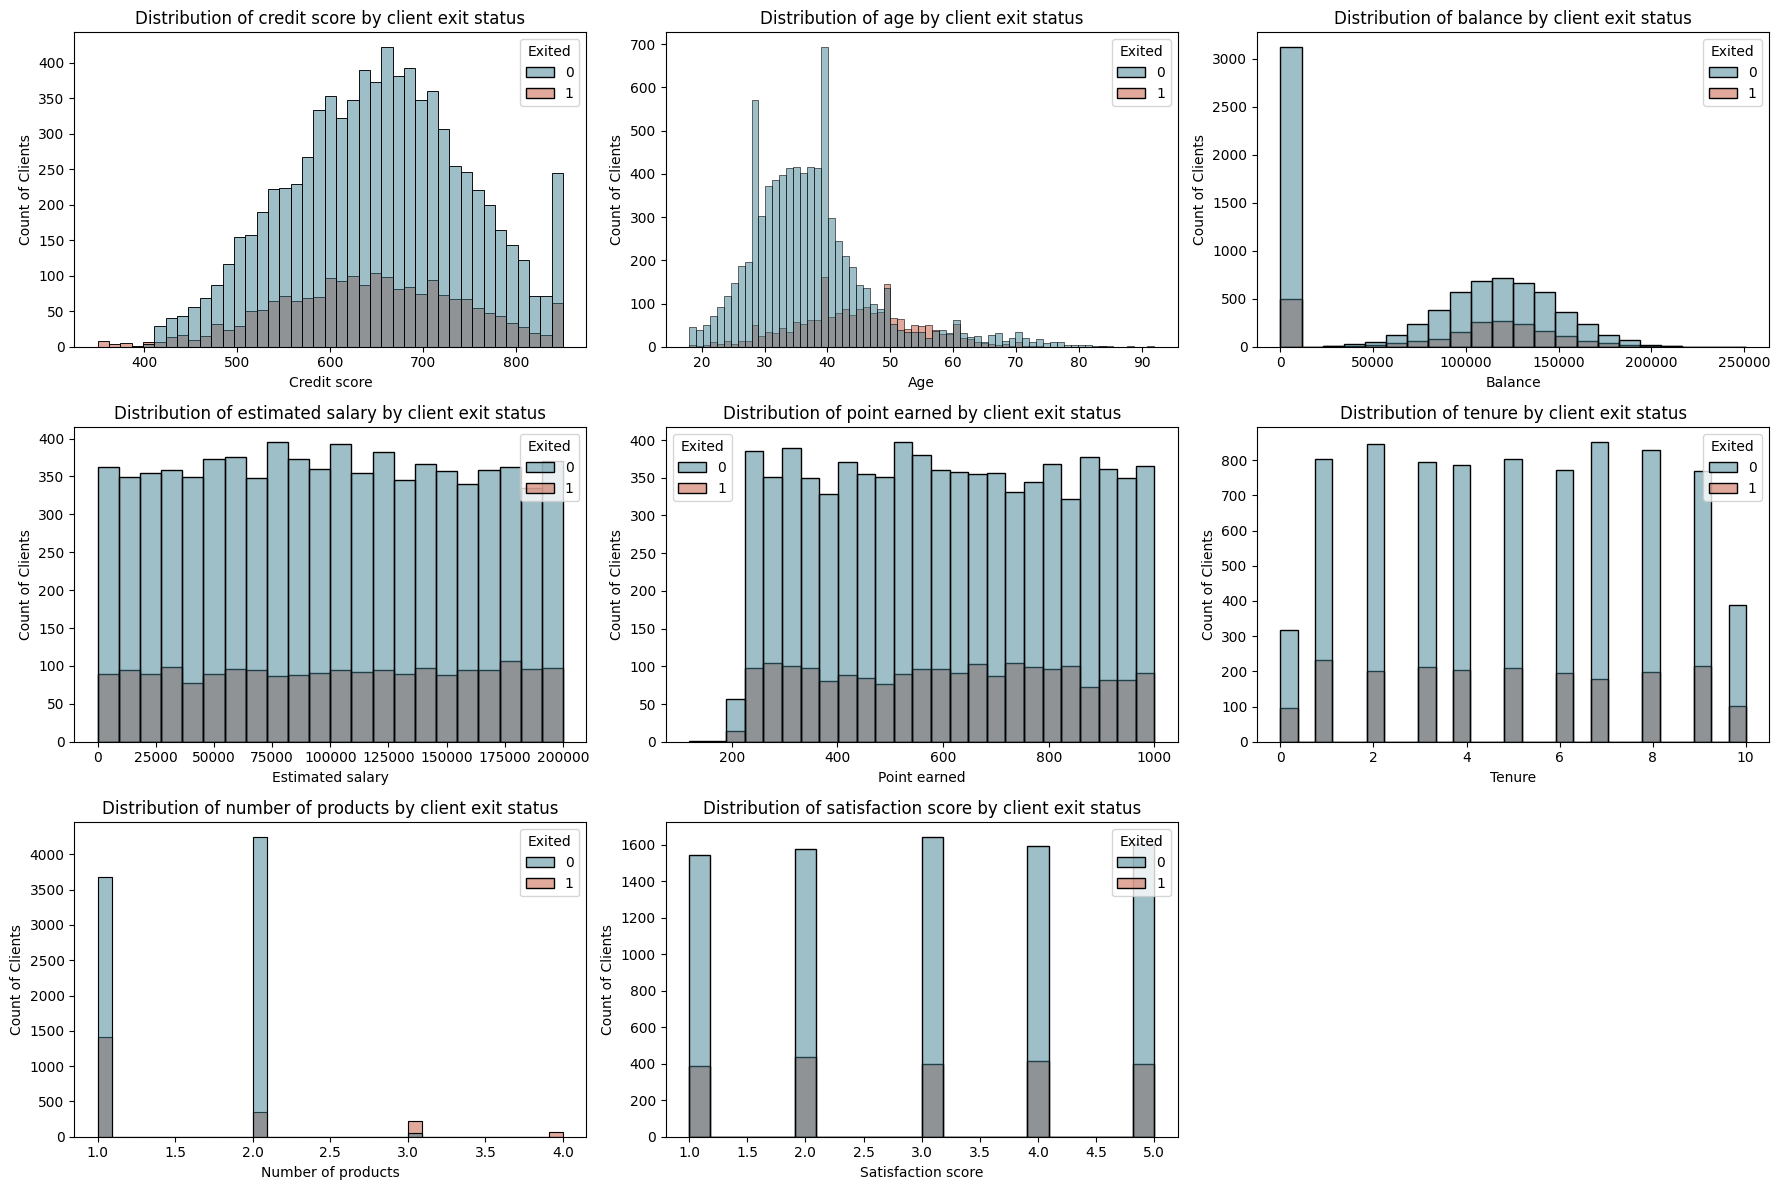

In [23]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, message="When grouping with a length-1 list-like")
warnings.filterwarnings("ignore", category=FutureWarning, message="use_inf_as_na option is deprecated")

fig, axes = plt.subplots(3, 3, figsize=(18, 12))

columns = ["CreditScore", "Age", "Balance", "EstimatedSalary", "PointEarned",
           "Tenure", "NumOfProducts", "SatisfactionScore"]

titles = ["Credit score", "Age", "Balance", "Estimated salary", "Point earned", "Tenure",
          "Number of products","Satisfaction score"]


for ax, column, title in zip(axes.flatten(), columns, titles):
    sns.histplot(x = df[column], hue=df['Exited'], ax=ax, palette=colors)
    ax.set_title(f"Distribution of {title.lower()} by client exit status", loc='center')
    ax.set_xlabel(title)
    ax.set_ylabel("Count of Clients")
    
plt.tight_layout()

fig.delaxes(axes[2][2])

plt.show()


Based on the subplots, we can observe that non-exited clients are dominant across all the features plotted. A significant number of non-exited clients are aged between 30 and 40. Additionally, the majority of clients have a zero balance. The highest number of products purchased is 2, while the numbers for 3 and 4 products are very low. Furthermore, the highest tenures are 2 and 7 years.

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=False, cmap=sns.diverging_palette(20, 220, n=200), center=0)
plt.title('Correlation Matrix of Client Features', loc='center')
plt.tight_layout() 
plt.show()

This correlation matrix shows the relationships between various client features. A strong positive correlation (close to 1.0) means that as one feature increases, the other also tends to increase. A strong negative correlation (close to -1.0) means that as one feature increases, the other tends to decrease. Key observations include strong negative correlations between male and female clients, and between certain membership tiers like DIAMOND, GOLD, PLATINUM, and SILVER. Additionally, features like "Exited" and "Complain" show meaningful correlations with other variables, suggesting factors that could influence customer retention and satisfaction.

## 4. Model Training & Evaluation <a class="anchor" id="chapter4"></a>

In [ ]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True,fmt='d', ax = ax,cmap=sns.diverging_palette(20, 220, n=200), center=0); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Exited', 'Retained']); ax.yaxis.set_ticklabels(['Exited', 'Retained']) 
    plt.show()

In [ ]:
def evaluate_model(model, X_test, Y_test):
    Y_pred = model.predict(X_test)
    print(classification_report(Y_test, Y_pred))
    print(f"ROC AUC: {roc_auc_score(Y_test, Y_pred)}")
    precision, recall, _ = precision_recall_curve(Y_test, Y_pred)
    pr_auc = auc(recall, precision)
    print(f"Precision-Recall AUC: {pr_auc}")
    print("Tuned hyperparameters - Best parameters : ",model.best_params_)
    plot_confusion_matrix(Y_test,Y_pred)

In [ ]:
Y=pd.Series(df['Exited'].to_numpy())
X = df[['Age','Balance', 'IsActiveMember', 'NumOfProducts', 'France', 'Germany', 'Spain', 'Female', 'Male']]
Y.tail(10)

In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=42, stratify=Y)
#stratify ensures that the train-test split maintains the same proportion of classes as the original dataset.

30% of the data will be used for testing, and the remaining 80% will be used for training.

In [ ]:
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### 4.1 Decision Tree <a class="anchor" id="m1"></a>

In [ ]:
pipeline_tree = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

parameters_tree = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__min_samples_leaf': [1, 2, 4, 6, 8],
    'classifier__min_samples_split': [2, 3, 4, 5, 6, 7],
}

grid_tree = GridSearchCV(pipeline_tree, param_grid=parameters_tree, cv=stratified_kf, scoring='f1')
grid_tree.fit(X_train, Y_train)
evaluate_model(grid_tree, X_test, Y_test)

* **True Positives**: 2008 instances correctly classified as "Exited."
* **True Negatives**: 392 instances correctly classified as "Retained."
* **False Positives**: 219 instance incorrectly classified as "Exited" when it is actually "Retained."
* **False Negatives**: 381 instance incorrectly classified as "Retained" when it is actually "Exited."

### 4.2 Random Forest <a class="anchor" id="m2"></a>

In [ ]:
pipeline_forest = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

parameters_forest = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [3, 4, 5, 6, 7, 9, 11],
    'classifier__min_samples_split': [2, 3, 4, 5, 6, 7],
}

grid_RF = GridSearchCV(pipeline_forest, param_grid=parameters_forest, cv=stratified_kf)
grid_RF.fit(X_train, Y_train)
evaluate_model(grid_RF, X_test, Y_test)

* **True Positives**: 2006 instances correctly classified as "Exited."
* **True Negatives**: 443 instances correctly classified as "Retained."
* **False Positives**: 168 instance incorrectly classified as "Exited" when it is actually "Retained."
* **False Negatives**: 383 instance incorrectly classified as "Retained" when it is actually "Exited."

### 4.3 Logistic Regression <a class="anchor" id="m3"></a>

In [ ]:
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=42))
])

parameters_lr = {
    'classifier__C': [0.01,0.1,1],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['lbfgs'],
}

grid_lr = GridSearchCV(pipeline_lr, param_grid=parameters_lr, cv=stratified_kf)
grid_lr.fit(X_train, Y_train)
evaluate_model(grid_lr, X_test, Y_test)

* **True Positives**: 1737 instances correctly classified as "Exited."
* **True Negatives**: 442 instances correctly classified as "Retained."
* **False Positives**: 169 instance incorrectly classified as "Exited" when it is actually "Retained."
* **False Negatives**: 652 instance incorrectly classified as "Retained" when it is actually "Exited."

### 4.4 KNN <a class="anchor" id="m4"></a>

In [ ]:
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', KNeighborsClassifier())
])

parameters_knn = {
    'classifier__n_neighbors': [1, 3, 5, 7, 9],
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'classifier__p': [1, 2],
    'classifier__metric': ['minkowski','euclidean','manhattan'],
}

grid_knn = GridSearchCV(pipeline_knn, param_grid=parameters_knn, cv=stratified_kf)
grid_knn.fit(X_train, Y_train)
evaluate_model(grid_knn, X_test, Y_test)

* **True Positives**: 1931 instances correctly classified as "Exited."
* **True Negatives**: 402 instances correctly classified as "Retained."
* **False Positives**: 209 instance incorrectly classified as "Exited" when it is actually "Retained."
* **False Negatives**: 458 instance incorrectly classified as "Retained" when it is actually "Exited."

### **Conclusion** <a class="anchor" id="chapter5"></a>
